In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima

In [2]:
#Load the dataframe

df_electricity = pd.read_csv('./global-data-on-sustainable-energy.csv')
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [3]:
#Change Density column because it has \n on the name
df_electricity_col_name_list = list(df_electricity.columns)
df_electricity_col_new_name_list = ['Entity',
 'Year',
 'Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Density_(P/Km2)',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']
df_electricity.columns = df_electricity_col_new_name_list


In [4]:
#replace to fix density dtype

df_electricity['Density_(P/Km2)'] = df_electricity['Density_(P/Km2)'].str.replace(',', '.')
df_electricity['Density_(P/Km2)'] = df_electricity['Density_(P/Km2)'].astype(float)
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

<Axes: >

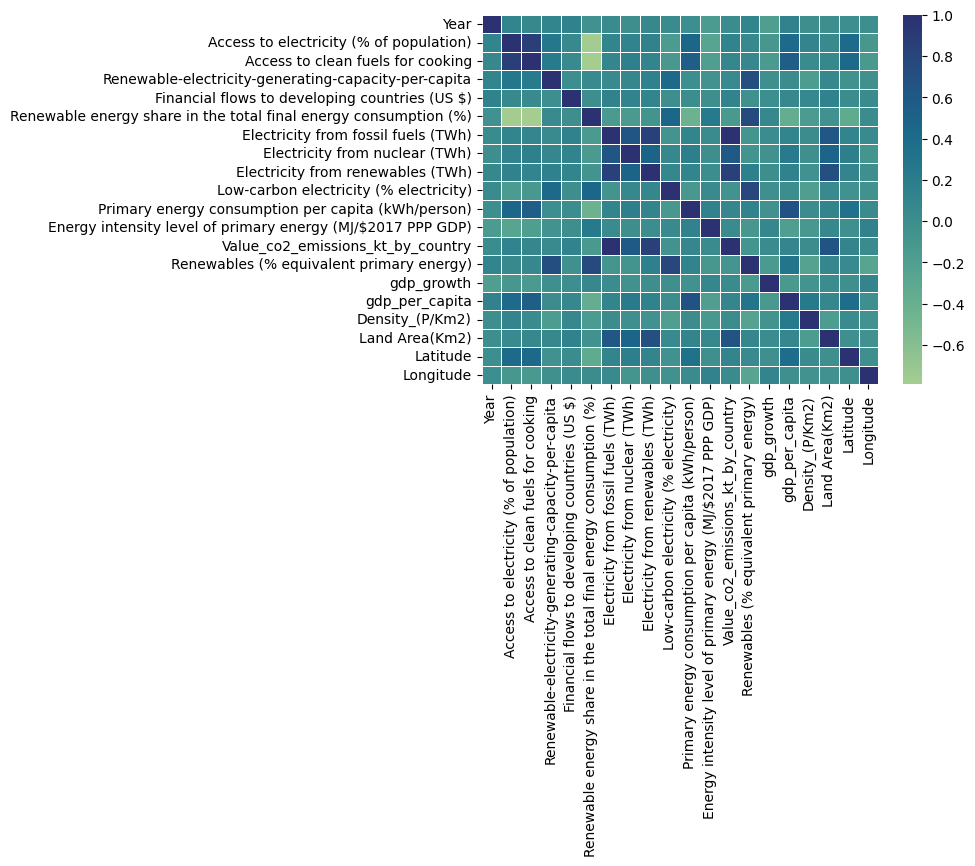

In [5]:
#Correlation matrix
df_electricity_num = df_electricity.drop(columns=['Entity'],axis=1)
sns.heatmap(df_electricity_num.corr(), cmap='crest',linewidths=0.5, cbar=True)

In [6]:
#Calculate some metrics
#explorings data metrics of Fossil fuels
print('Fossil fuels consumption \n')
print('mean:',df_electricity['Electricity from fossil fuels (TWh)'].mean())
print('min:', df_electricity['Electricity from fossil fuels (TWh)'].min())
print('max:', df_electricity['Electricity from fossil fuels (TWh)'].max())
print('median:', df_electricity['Electricity from fossil fuels (TWh)'].median())
print('std:', df_electricity['Electricity from fossil fuels (TWh)'].std())

#explorings data metrics of Nuclear fuels
print('\n')
print('Nuclear fuels consumption \n')
print('mean:',df_electricity['Electricity from nuclear (TWh)'].mean())
print('min:', df_electricity['Electricity from nuclear (TWh)'].min())
print('max:', df_electricity['Electricity from nuclear (TWh)'].max())
print('median:', df_electricity['Electricity from nuclear (TWh)'].median())
print('std:', df_electricity['Electricity from nuclear (TWh)'].std())

#explorings data metrics of Renewables fuels
print('\n')
print('Renewables fuels consumption \n')
print('mean:',df_electricity['Electricity from renewables (TWh)'].mean())
print('min:', df_electricity['Electricity from renewables (TWh)'].min())
print('max:', df_electricity['Electricity from renewables (TWh)'].max())
print('median:', df_electricity['Electricity from renewables (TWh)'].median())
print('std:', df_electricity['Electricity from renewables (TWh)'].std())


Fossil fuels consumption 

mean: 70.36500275633958
min: 0.0
max: 5184.13
median: 2.97
std: 348.05186613011125


Nuclear fuels consumption 

mean: 13.450190178824867
min: 0.0
max: 809.41
median: 0.0
std: 73.00662309724117


Renewables fuels consumption 

mean: 23.968009922822493
min: 0.0
max: 2184.94
median: 1.47
std: 104.43108494343312


C:\Users\jcarl\AppData\Local\Temp\ipykernel_2812\1818730156.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= percentage.values, y= percentage.index, palette='viridis')


<Axes: ylabel='None'>

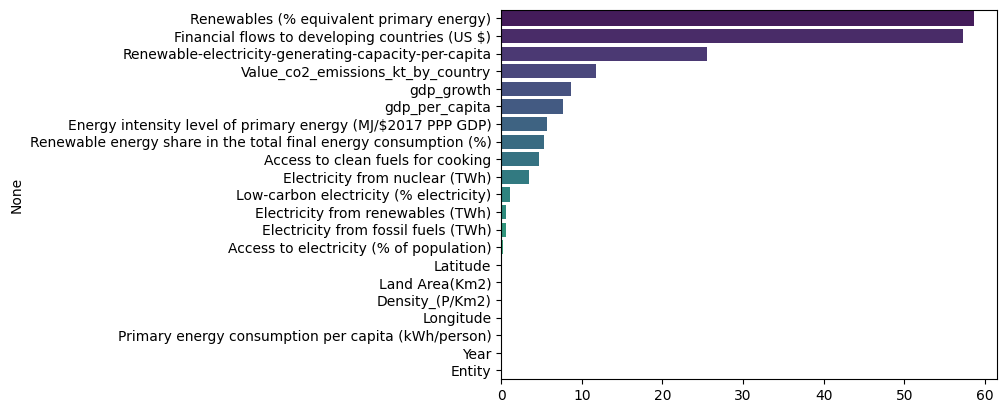

In [7]:
#Missing data imputation

missing_values = df_electricity.isnull().mean()
percentage = (missing_values * 100).sort_values(ascending=False)

#Plot it
sns.barplot(x= percentage.values, y= percentage.index, palette='viridis')

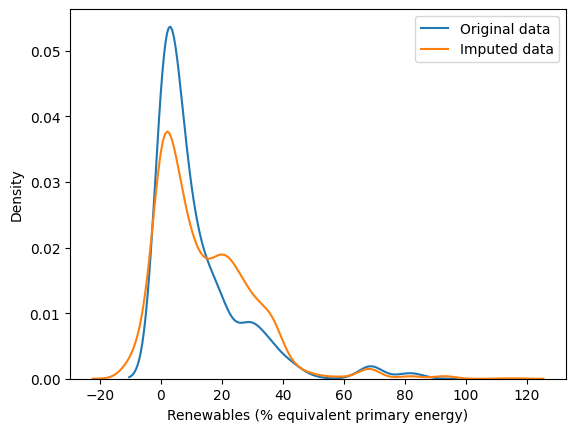

In [8]:
# Iterative Imputer

df_iterative_imp = copy.deepcopy(df_electricity)
df_electricity2 = df_electricity.iloc[:,2:]
imputer = IterativeImputer()
df_iterative_imp = df_iterative_imp.drop(columns=['Entity'])
df_iterative_imp[:] = imputer.fit_transform(df_iterative_imp)
sns.kdeplot(df_electricity2['Renewables (% equivalent primary energy)'], label='Original data')
sns.kdeplot(df_iterative_imp['Renewables (% equivalent primary energy)'], label='Imputed data')
plt.legend()

In [9]:
#Joining the dropped column again
df_iterative_imp.insert(0,'Entity', df_electricity['Entity'])

In [10]:
#Feature selection

X_features = df_iterative_imp.drop(columns=['Entity', 'Latitude', 'Longitude'], axis=1)
y_co2 = df_iterative_imp['Value_co2_emissions_kt_by_country']

#Use Decision Tree Regressor to find the most important features

model = DecisionTreeRegressor()
model.fit(X_features,y_co2)
feature_importance = model.feature_importances_

importance_list = zip(X_features.columns, feature_importance)

for importance in sorted(importance_list, key = lambda feature:feature[1], reverse=True):
    print(importance)
    

('Value_co2_emissions_kt_by_country', 0.8901916425717584)
('Renewable-electricity-generating-capacity-per-capita', 0.08376752971287985)
('Electricity from fossil fuels (TWh)', 0.016380240258450963)
('Access to clean fuels for cooking', 0.003526376319309672)
('Year', 0.002280423835840653)
('Electricity from renewables (TWh)', 0.0016285106238098498)
('Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 0.0015199039332122325)
('Primary energy consumption per capita (kWh/person)', 0.0004107946305010515)
('Renewable energy share in the total final energy consumption (%)', 0.00016407423125579696)
('Access to electricity (% of population)', 8.066998625379822e-05)
('gdp_growth', 2.232522845814571e-05)
('Electricity from nuclear (TWh)', 1.0058099072682122e-05)
('Financial flows to developing countries (US $)', 8.834437720221101e-06)
('Renewables (% equivalent primary energy)', 8.015975505463475e-06)
('Low-carbon electricity (% electricity)', 3.1931350369385066e-07)
('Density_(P/Km2)',

Top 5 most correlated features: Value_co2_emissions_kt_by_country      1.000000
Electricity from fossil fuels (TWh)    0.990383
Electricity from renewables (TWh)      0.861740
Land Area(Km2)                         0.648892
Electricity from nuclear (TWh)         0.600732
Name: Value_co2_emissions_kt_by_country, dtype: float64


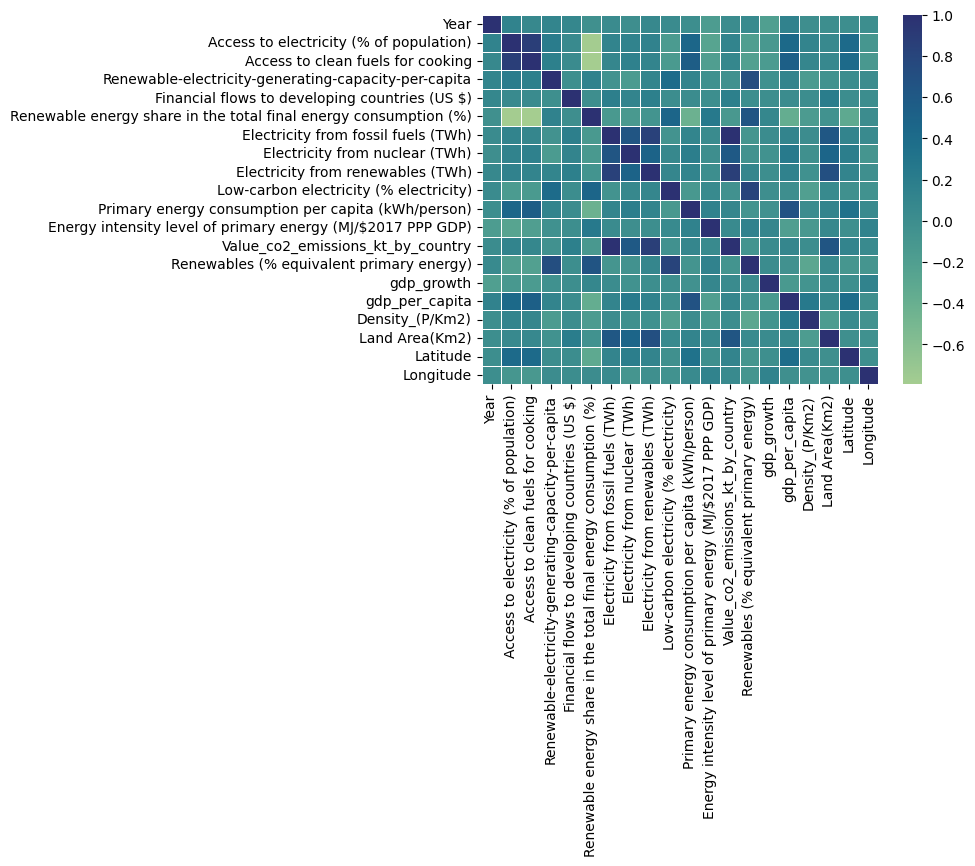

In [11]:
#Correlation Matrix
df_iter_imp_num = df_iterative_imp.drop(columns=['Entity'])
sns.heatmap(df_iter_imp_num.corr(), cmap='crest', linewidth=0.5, cbar=True)

print('Top 5 most correlated features:', df_iter_imp_num.corr()['Value_co2_emissions_kt_by_country'].sort_values(ascending=False).head(5))

In [12]:
X_features.columns

Index(['Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density_(P/Km2)', 'Land Area(Km2)'],
      dtype='object')

In [13]:
#Scaling the data
scaler = MinMaxScaler()
X_features_scaled = X_features.drop(columns=['Year'])

X_scaled = scaler.fit_transform(X_features_scaled)

X_scaled_df = pd.DataFrame(X_scaled)

X_scaled_df = X_scaled_df.rename(columns={0:'Access to electricity (% of population)',
                                         1: 'Access to clean fuels for cooking', 2:'Renewable-electricity-generating-capacity-per-capita',
                                         3:'Financial flows to developing countries (US $)', 4:'Renewable energy share in the total final energy consumption (%)',
                                         5:'Electricity from fossil fuels (TWh)', 6:'Electricity from nuclear (TWh)',
                                         7:'Electricity from renewables (TWh)', 8: 'Low-carbon electricity (% electricity)',
                                         9: 'Primary energy consumption per capita (kWh/person)', 10:'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                                         11: 'Value_co2_emissions_kt_by_country', 12: 'Renewables (% equivalent primary energy)', 13: 'gdp_growth', 14: 'gdp_per_capita',
                                         15: 'Density_(P/Km2)', 16: 'Land Area(Km2)'})

X_scaled_df

,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density_(P/Km2),Land Area(Km2)
0,0.003659,0.053828,0.186351,0.000004,0.475453,0.003150,0.053522,0.019128,0.666522,0.001152,0.159060,0.008798,0.182165,0.369404,0.179095,0.045896,0.065321
1,0.028581,0.062510,0.186255,0.000025,0.480998,0.003137,0.053522,0.019213,0.850571,0.000902,0.161779,0.008796,0.211493,0.368656,0.185778,0.045896,0.065321
2,0.082603,0.071192,0.186151,0.000759,0.410372,0.003144,0.053522,0.019240,0.815439,0.000803,0.152535,0.008821,0.186830,0.369891,0.102829,0.045896,0.065321
3,0.136573,0.082478,0.186050,0.004992,0.399737,0.003179,0.053522,0.019272,0.676944,0.000876,0.152535,0.008837,0.169633,0.382842,0.102911,0.045896,0.065321
4,0.190513,0.094633,0.185959,0.017170,0.468636,0.003183,0.053522,0.019240,0.636781,0.000778,0.147098,0.008821,0.184143,0.342790,0.103061,0.045896,0.065321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,0.418333,0.258721,0.200661,0.000006,0.810950,0.003792,0.053522,0.020480,0.497278,0.012292,0.386356,0.009671,0.313324,0.339236,0.112177,0.028705,0.039134
3645,0.434707,0.258721,0.200515,0.001071,0.816040,0.003706,0.053522,0.020920,0.593503,0.011684,0.373034,0.009613,0.330412,0.360582,0.110509,0.028705,0.039134
3646,0.448824,0.259589,0.205902,0.000002,0.795770,0.003837,0.053522,0.021440,0.602408,0.013108,0.381734,0.009787,0.330583,0.361202,0.110650,0.028705,0.039134
3647,0.461066,0.261325,0.205600,0.000048,0.807314,0.003823,0.053522,0.021045,0.564891,0.011439,0.399135,0.009734,0.324400,0.301982,0.111102,0.028705,0.039134


In [14]:
#Rejoining categorical data

year_col = df_electricity['Year']
countries_col = df_electricity['Entity']

X_scaled_df2= pd.concat([year_col,countries_col, X_scaled_df], axis=1)
X_scaled_df2

,Year,Entity,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density_(P/Km2),Land Area(Km2)
0,2000,Afghanistan,0.003659,0.053828,0.186351,0.000004,0.475453,0.003150,0.053522,0.019128,0.666522,0.001152,0.159060,0.008798,0.182165,0.369404,0.179095,0.045896,0.065321
1,2001,Afghanistan,0.028581,0.062510,0.186255,0.000025,0.480998,0.003137,0.053522,0.019213,0.850571,0.000902,0.161779,0.008796,0.211493,0.368656,0.185778,0.045896,0.065321
2,2002,Afghanistan,0.082603,0.071192,0.186151,0.000759,0.410372,0.003144,0.053522,0.019240,0.815439,0.000803,0.152535,0.008821,0.186830,0.369891,0.102829,0.045896,0.065321
3,2003,Afghanistan,0.136573,0.082478,0.186050,0.004992,0.399737,0.003179,0.053522,0.019272,0.676944,0.000876,0.152535,0.008837,0.169633,0.382842,0.102911,0.045896,0.065321
4,2004,Afghanistan,0.190513,0.094633,0.185959,0.017170,0.468636,0.003183,0.053522,0.019240,0.636781,0.000778,0.147098,0.008821,0.184143,0.342790,0.103061,0.045896,0.065321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,2016,Zimbabwe,0.418333,0.258721,0.200661,0.000006,0.810950,0.003792,0.053522,0.020480,0.497278,0.012292,0.386356,0.009671,0.313324,0.339236,0.112177,0.028705,0.039134
3645,2017,Zimbabwe,0.434707,0.258721,0.200515,0.001071,0.816040,0.003706,0.053522,0.020920,0.593503,0.011684,0.373034,0.009613,0.330412,0.360582,0.110509,0.028705,0.039134
3646,2018,Zimbabwe,0.448824,0.259589,0.205902,0.000002,0.795770,0.003837,0.053522,0.021440,0.602408,0.013108,0.381734,0.009787,0.330583,0.361202,0.110650,0.028705,0.039134
3647,2019,Zimbabwe,0.461066,0.261325,0.205600,0.000048,0.807314,0.003823,0.053522,0.021045,0.564891,0.011439,0.399135,0.009734,0.324400,0.301982,0.111102,0.028705,0.039134


In [ ]:
# Forecasting Co2 emissions with auto arima
countries = X_scaled_df2['Entity'].unique()

filtered_data = X_scaled_df2[X_scaled_df2['Entity'].isin(countries)]
country_data = filtered_data.set_index('Year')['Value_co2_emissions_kt_by_country']

def auto_arima_forecast_co2(country_data):
    co2_emissions = country_data['Value_co2_emissions_kt_by_country'].dropna()

    #We ensure that there are no negative values
    co2_emissions = co2_emissions.clip(lower=0)
    
    # Create and fit model
    model = auto_arima(co2_emissions, seasonal=False, stepwise=True, suppress_warnings=True)
    model_fit = model.fit(co2_emissions)
    forecast = model_fit.predict(n_periods=5)

    #We ensure that there are no negative values
    forecast = np.clip(forecast, 0, None)

    return forecast, model_fit

# Create a dataframe to store historical and predicted values
combined_df = pd.DataFrame(columns=['Entity', 'Year', 'CO2_Emissions', 'Type'])

for country in countries:
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    forecast, model_fit = auto_arima_forecast_co2(country_data)
    
    # Create a temp dataframe to store historical values
    historical_df = country_data[['Entity', 'Year', 'Value_co2_emissions_kt_by_country']].copy()
    historical_df.rename(columns={'Value_co2_emissions_kt_by_country': 'CO2_Emissions'}, inplace=True)
    historical_df['Type'] = 'Historical'
    
    # Create a temp dataframe to store predicted values
    forecast_years = np.arange(2021, 2026)
    forecast_df = pd.DataFrame({
        'Entity': country,
        'Year': forecast_years,
        'CO2_Emissions': forecast,
        'Type': 'Forecast'
    })
    
    # Combine both dataframes
    combined_df = pd.concat([combined_df, historical_df, forecast_df], ignore_index=True)

# Export to CSV
combined_df.to_csv('co2_emissions_predictions.csv', index=False, float_format='%.6f')

In [15]:
# Forecast energy consumption with auto arima
countries = X_scaled_df2['Entity'].unique()
filtered_data = X_scaled_df2[X_scaled_df2['Entity'].isin(countries)]
country_data = filtered_data.set_index('Year')['Primary energy consumption per capita (kWh/person)']

def auto_arima_forecast_consumption(country_data):
    primary_consumption = country_data['Primary energy consumption per capita (kWh/person)'].dropna()
    
    #We ensure that there are no negative values
    primary_consumption = primary_consumption.clip(lower=0)
    
    # Create and fit model
    model = auto_arima(primary_consumption, seasonal=False, stepwise=True, suppress_warnings=True)
    model_fit = model.fit(primary_consumption)

    forecast = model_fit.predict(n_periods=5)

    #We ensure that there are no negative values
    forecast = np.clip(forecast, 0, None)

    return forecast, model_fit

# Create a dataframe to store histocial and predicted values
combined_df = pd.DataFrame(columns=['Entity', 'Year', 'Energy_consumption', 'Type'])

for country in countries:
    country_data = filtered_data[filtered_data['Entity'] == country].sort_values('Year')
    forecast, model_fit = auto_arima_forecast_consumption(country_data)
    
    # Create a temp dataframe for historical data
    historical_df = country_data[['Entity', 'Year', 'Primary energy consumption per capita (kWh/person)']].copy()
    historical_df.rename(columns={'Primary energy consumption per capita (kWh/person)': 'Energy_consumption'}, inplace=True)
    historical_df['Type'] = 'Historical'
    
    # Create a temp dataframe to store predicted data
    forecast_years = np.arange(2021, 2026)
    forecast_df = pd.DataFrame({
        'Entity': country,
        'Year': forecast_years,
        'Energy_consumption': forecast,
        'Type': 'Forecast'
    })
    
    # Combine both dataframes
    combined_df = pd.concat([combined_df, historical_df, forecast_df], ignore_index=True)

# Export to CSV
combined_df.to_csv('energy_consumption_predictions.csv', index=False, float_format='%.6f')

C:\Users\jcarl\anaconda3\envs\pmd_arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jcarl\anaconda3\envs\pmd_arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\jcarl\anaconda3\envs\pmd_arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\jcarl\anaconda3\envs\pmd_arima\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a suppor